In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing model and data
from sklearn import linear_model
from sklearn.model_selection import train_test_split # splits train and test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/drive/My Drive/Machine Learning Notebooks/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [4]:
dft = df[["Humidity","Temperature (C)"]]
dfa = df[["Humidity","Apparent Temperature (C)"]]
dft = dft.rename(columns = {'Temperature (C)': 'Temperature'}, inplace = False)
dfa = dfa.rename(columns = {'Apparent Temperature (C)': 'Apparent'}, inplace = False)

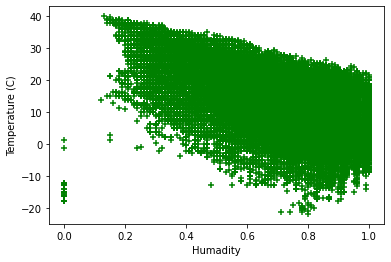

In [5]:
plt.xlabel("Humadity")
plt.ylabel("Temperature (C)")
plt.scatter(dft.Humidity ,dft.Temperature,color = 'green', marker='+')

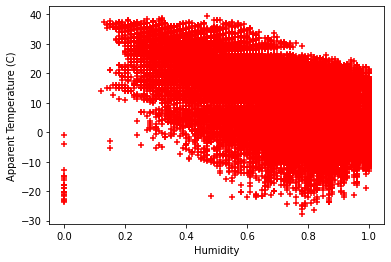

In [6]:
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature (C)")
plt.scatter(df['Humidity'] ,df['Apparent Temperature (C)'], color = 'red', marker='+')

In [7]:
x = dfa.iloc[:, :-1].values
y = dfa.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(regressor.intercept_)

35.08572599144667


In [9]:
print(regressor.coef_)

[-32.96509622]


In [10]:
y_pred = regressor.predict(x_test)
print(regressor.predict(x[:5]))
print(x[:5])

[5.74679035 6.73574324 5.74679035 7.72469613 7.72469613]
[[0.89]
 [0.86]
 [0.89]
 [0.83]
 [0.83]]


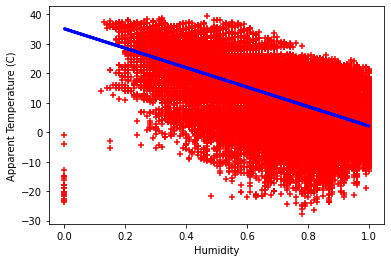

In [11]:
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature (C)")
plt.scatter(df[['Humidity']].values ,df["Apparent Temperature (C)"].values, color = 'red', marker='+')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

Coefficients: 
 [-32.96509622]
Mean squared error: 72.96
Coefficient of determination: 0.36


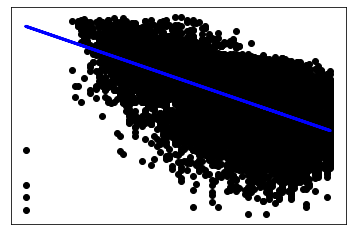

In [12]:
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [15]:
print(regressor.predict(x[:5]))
print(y[:5])
print(regressor.score(x, y))

[5.74679035 6.73574324 5.74679035 7.72469613 7.72469613]
[7.38888889 7.22777778 9.37777778 5.94444444 6.97777778]
0.36309158378316886
